# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [1]:
!wget "https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=1" -O housing_market.csv

--2022-04-24 18:51:15--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=1
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando-se a www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: /s/dl/0bl91ufgvfarhjh/housing_market.csv [redirecionando]
--2022-04-24 18:51:16--  https://www.dropbox.com/s/dl/0bl91ufgvfarhjh/housing_market.csv
Reaproveitando a conexão existente para [www.dropbox.com]:443.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://ucdb8b6ba32f4c2e62b18b5f11fb.dl.dropboxusercontent.com/cd/0/get/BkBOhcPWaxW0rmXYWwZ99PgiTtTooVRqU54Zk1MLxADOoIfiuCquMhwnfKcLRarRU09H01CaV3Z_7031MDeWfOJFE_Q_MV8qLoPwMgZJxT2otI2cHA0QF2rr8vfgx1iChMY0C6SLYsN9nsaMfsNV3gPe-4Fb7v-5aBsWMnrdQf0ydA/file?dl=1# [redirecionando]
--2022-04-24

In [2]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [3]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [4]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [5]:
## TODO

# Parâmetro para ordenação dos valores
def ordenarValores(valor):
    return valor[1]

# Calcular quantos porcento de dados faltantes em uma lista
def percentualDadosFaltantes(dado, tamanhoLista):
    return len(dado) / tamanhoLista * 100
    
# Numero de elementos nulos em cada uma das colunas
numNULLInArray = []
tamTotalArray = 0
tamTotalDadosFaltantes = 0

# Deslocando as colunas verificando por dados vazios
for column in df:
    numNULLInArray.append([column, percentualDadosFaltantes(df[df[column].isnull()], len(df))])
    tamTotalArray += len(df[column])
    tamTotalDadosFaltantes += len(df[df[column].isnull()])

numNULLInArray.sort(reverse=True, key=ordenarValores)

print("Porcentagem de dados faltantes em cada coluna da lista:")
print("")
print(numNULLInArray)    

print("")
print("Porcentagem total de dados faltantes:")
print(tamTotalDadosFaltantes / tamTotalArray * 100)

Porcentagem de dados faltantes em cada coluna da lista:

[['hospital_beds_raion', 47.39260280266483], ['build_year', 44.649010534606674], ['state', 44.498047323684816], ['cafe_sum_500_min_price_avg', 43.585704440287486], ['cafe_sum_500_max_price_avg', 43.585704440287486], ['cafe_avg_price_500', 43.585704440287486], ['max_floor', 31.413475107479243], ['material', 31.413475107479243], ['num_room', 31.413475107479243], ['kitch_sq', 31.413475107479243], ['preschool_quota', 21.94873814446523], ['school_quota', 21.93889271766598], ['cafe_sum_1000_min_price_avg', 21.410521479439467], ['cafe_sum_1000_max_price_avg', 21.410521479439467], ['cafe_avg_price_1000', 21.410521479439467], ['life_sq', 20.947786419874635], ['raion_build_count_with_material_info', 16.379508385021822], ['build_count_block', 16.379508385021822], ['build_count_wood', 16.379508385021822], ['build_count_frame', 16.379508385021822], ['build_count_brick', 16.379508385021822], ['build_count_monolith', 16.379508385021822], ['buil

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [6]:
## TODO

# Para não enviesar os dados númericos, serão apenas removidos, uma vez que
# pode gerar efeitos colaterais nos processos que serão feitos no dataframe
df.dropna(inplace=True)

# Como não será calculado nada usando strings - como médias, mediana ou moda -
# irei apenas modificar os valores inválidos para NA
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
df[non_numeric_cols] = df[non_numeric_cols].replace('', 'NA')

df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
8056,8059,2013-05-21,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,...,339,135,26,133,207,1,89,161,10,2750000
8154,8157,2013-05-27,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,...,2,1,0,3,8,1,0,19,3,7100000
8287,8290,2013-06-03,77,50.0,3.0,5.0,2.0,1957.0,3.0,8.0,...,214,85,21,48,89,1,54,146,12,11700000
8387,8390,2013-06-07,56,29.0,5.0,16.0,5.0,1987.0,2.0,10.0,...,74,32,8,19,34,0,10,121,7,10400000
8391,8394,2013-06-07,31,21.0,5.0,9.0,5.0,1962.0,1.0,5.0,...,99,43,8,17,41,1,18,93,5,6200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30462,30465,2015-06-30,47,30.0,23.0,25.0,4.0,2016.0,1.0,10.0,...,99,57,12,23,42,1,13,123,7,10544070
30463,30466,2015-06-30,56,29.0,13.0,14.0,1.0,2001.0,2.0,11.0,...,14,2,0,13,12,0,1,53,6,12000000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [7]:
## TODO...

# Verificando todos os elementos únicos em uma coluna, contando eles e removendo do dataframe
for column in df:
    _, counts = np.unique(df[column], return_counts=True)
    for count in counts:
        if count / len(df[column]) > 0.95:
            df.drop(columns=[column])
            break

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de atributos

In [8]:
## TODO...
#df['num_room'].describe()

for column in df.select_dtypes(include=[np.number]):
    # Valores descritos do dataframe
    descr = df[column].describe()
    
    outliers = []
    for elemento in df[column]: 
        # Achando os outliers
        # Valores fora da média pelo desvio padrão
        if elemento < (float(descr['mean']) - float(descr['std'])) or elemento > (float(descr['mean']) + float(descr['std'])):
            outliers.append(elemento)
    
    print(f"{column} outliers: {outliers}", end='\n\n----------------------------------------\n\n')

id outliers: [8059, 8157, 8290, 8390, 8394, 8413, 8426, 8430, 8455, 8473, 8502, 8504, 8522, 8538, 8566, 8580, 8593, 8628, 8642, 8655, 8692, 8699, 8702, 8703, 8705, 8724, 8726, 8730, 8732, 8743, 8749, 8777, 8798, 8821, 8825, 8828, 8872, 8897, 8909, 8915, 8917, 8930, 8932, 8936, 8956, 8970, 8979, 8981, 9014, 9022, 9027, 9033, 9040, 9056, 9069, 9090, 9110, 9113, 9127, 9129, 9147, 9155, 9161, 9164, 9173, 9178, 9208, 9211, 9226, 9232, 9246, 9248, 9259, 9267, 9271, 9297, 9306, 9310, 9364, 9370, 9390, 9419, 9440, 9447, 9459, 9460, 9464, 9466, 9470, 9471, 9477, 9486, 9488, 9491, 9492, 9496, 9523, 9524, 9525, 9526, 9530, 9536, 9544, 9549, 9555, 9575, 9577, 9584, 9586, 9596, 9600, 9608, 9615, 9624, 9638, 9639, 9654, 9673, 9681, 9686, 9689, 9693, 9697, 9699, 9706, 9721, 9725, 9726, 9728, 9731, 9732, 9734, 9735, 9740, 9746, 9749, 9750, 9751, 9756, 9762, 9768, 9777, 9789, 9799, 9805, 9813, 9819, 9827, 9829, 9833, 9839, 9841, 9845, 9848, 9853, 9856, 9873, 9875, 9877, 9888, 9893, 9907, 9911, 9914, 99

material outliers: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 6.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 6.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 6.0, 5.0, 4.0, 4.0, 5.0, 4.0, 6.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 4.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 6.0, 5.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 6.0, 5.0, 6.0, 6.0, 4.0, 5.0, 5.0, 4.0, 6.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 6.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 

area_m outliers: [18036436.51, 18800000.1, 16861532.79, 18036436.51, 2641243.496, 24813850.39, 16861532.79, 16861532.79, 52351766.54, 2641243.496, 24813850.39, 18036436.51, 17881913.61, 2641243.496, 18445806.5, 18445806.5, 18036436.51, 18800000.1, 17881913.61, 18800000.1, 18036436.51, 18036436.51, 18036436.51, 52351766.54, 2641243.496, 18445806.5, 2641243.496, 2641243.496, 18036436.51, 2641243.496, 24813850.39, 18036436.51, 24813850.39, 16861532.79, 18036436.51, 18800000.1, 52351766.54, 24813850.39, 16861532.79, 18445806.5, 18036436.51, 18445806.5, 16861532.79, 52351766.54, 24813850.39, 18800000.1, 18036436.51, 52351766.54, 16861532.79, 17881913.61, 18800000.1, 18800000.1, 18036436.51, 24813850.39, 16861532.79, 16861532.79, 24813850.39, 18036436.51, 24813850.39, 18445806.5, 18800000.1, 17881913.61, 18036436.51, 17881913.61, 52351766.54, 52351766.54, 18800000.1, 2641243.496, 18036436.51, 16861532.79, 16861532.79, 17526506.21, 18445806.5, 18036436.51, 18036436.51, 52351766.54, 24813850.3

preschool_quota outliers: [165.0, 903.0, 1120.0, 5001.0, 1040.0, 5001.0, 1070.0, 4182.0, 922.0, 5001.0, 1070.0, 5041.0, 0.0, 926.0, 643.0, 165.0, 884.0, 165.0, 4172.0, 5001.0, 4182.0, 4182.0, 4050.0, 643.0, 884.0, 933.0, 4519.0, 4172.0, 7610.0, 866.0, 5041.0, 0.0, 5153.0, 1120.0, 884.0, 165.0, 627.0, 4116.0, 922.0, 627.0, 4116.0, 926.0, 926.0, 926.0, 933.0, 926.0, 903.0, 5153.0, 903.0, 1037.0, 4249.0, 866.0, 1040.0, 926.0, 933.0, 4050.0, 884.0, 926.0, 4116.0, 884.0, 5041.0, 884.0, 4519.0, 0.0, 926.0, 627.0, 1037.0, 1037.0, 884.0, 4172.0, 1037.0, 5001.0, 5041.0, 4519.0, 933.0, 5041.0, 4519.0, 165.0, 4172.0, 4182.0, 922.0, 5001.0, 926.0, 165.0, 903.0, 1120.0, 4050.0, 5041.0, 1037.0, 4519.0, 4116.0, 4172.0, 922.0, 5041.0, 5041.0, 4249.0, 4519.0, 1065.0, 1065.0, 4116.0, 4182.0, 5041.0, 627.0, 0.0, 4182.0, 4050.0, 1037.0, 0.0, 5001.0, 922.0, 165.0, 5001.0, 5001.0, 4116.0, 4172.0, 5041.0, 903.0, 0.0, 5041.0, 4050.0, 4116.0, 4182.0, 5153.0, 866.0, 5001.0, 903.0, 7610.0, 5041.0, 903.0, 926.0, 

school_education_centers_top_20_raion outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

additional_education_raion outliers: [10, 0, 0, 0, 7, 0, 16, 0, 7, 11, 10, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 0, 0, 0, 7, 0, 16, 0, 0, 0, 0, 0, 16, 10, 0, 0, 7, 11, 16, 0, 0, 16, 16, 0, 0, 7, 10, 11, 16, 7, 11, 0, 16, 0, 16, 7, 0, 16, 0, 0, 0, 11, 16, 0, 0, 0, 0, 0, 11, 7, 16, 0, 0, 0, 11, 16, 16, 0, 0, 10, 0, 0, 16, 0, 0, 0, 0, 7, 0, 0, 7, 0, 16, 0, 16, 0, 11, 11, 0, 0, 16, 0, 11, 0, 7, 0, 7, 11, 16, 11, 11, 16, 11, 0, 0, 16, 11, 0, 16, 0, 16, 0, 0, 16, 0, 0, 0, 0, 16, 16, 0, 0, 7, 0, 0, 0, 0, 7, 7, 11, 0, 11, 0, 11, 0, 16, 16, 0, 0, 10, 0, 7, 0, 7, 7, 0, 16, 10, 11, 0, 7, 11, 16, 16, 0, 0, 0, 16, 11, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 7, 7, 0, 11, 0, 11, 0, 0, 0, 0, 0, 16, 16, 16, 7, 11, 0, 11, 0, 7, 0, 16, 0, 10, 16, 7, 16, 0, 0, 0, 0, 16, 0, 16, 11, 0, 16, 10, 0, 0, 0, 0, 7, 0, 0, 10, 7, 0, 11, 0, 7, 0, 16, 0, 11, 0, 7, 10, 10, 0, 0, 0, 10, 0, 16, 16, 0, 10, 11, 16, 7, 0, 16, 7, 16, 16, 7, 0, 0, 0, 10, 0, 0, 16, 7, 0, 16, 0, 0, 0, 16, 0, 0, 

male_f outliers: [502659, 637906, 774585, 607126, 440615, 637906, 637906, 637906, 637906, 635195, 637906, 440615, 637906, 774585, 637906, 635195, 635195, 635195, 774585, 774585, 440615, 637906, 635195, 774585, 774585, 635195, 607126, 637906, 637906, 607126, 774585, 607126, 637906, 502659, 607126, 774585, 502659, 774585, 774585, 637906, 607126, 635195, 774585, 774585, 607126, 774585, 502659, 635195, 637906, 502659, 637906, 637906, 637906, 774585, 637906, 440615, 607126, 607126, 637906, 774585, 607126, 607126, 607126, 607126, 607126, 607126, 502659, 611775, 774585, 637906, 774585, 607126, 635195, 635195, 607126, 635195, 637906, 607126, 774585, 635195, 774585, 774585, 502659, 502659, 502659, 637906, 607126, 607126, 637906, 440615, 502659, 607126, 637906, 611775, 607126, 635195, 607126, 607126, 440615, 774585, 637906, 607126, 607126, 502659, 635195, 635195, 637906, 637906, 774585, 502659, 635195, 611775, 607126, 637906, 637906, 637906, 637906, 607126, 502659, 635195, 502659, 637906, 607126

work_all outliers: [100601, 100062, 36496, 37484, 98207, 22837, 33502, 100062, 98207, 33149, 98207, 98260, 100601, 28737, 100062, 35405, 91795, 105171, 91795, 98207, 35405, 35003, 93008, 105171, 140182, 41554, 98260, 36496, 13143, 100601, 28737, 107626, 37484, 35405, 25933, 93843, 33149, 31832, 25933, 93843, 91795, 91795, 40289, 35003, 100601, 36496, 107626, 100601, 91795, 100601, 100062, 100601, 41554, 22837, 35003, 35405, 13143, 93843, 35405, 98260, 35405, 93008, 34380, 16642, 25933, 100601, 35405, 105171, 98207, 100601, 98260, 31832, 93008, 35003, 98260, 93008, 13143, 105171, 34380, 33149, 98207, 91795, 33502, 100601, 37484, 98260, 93008, 93843, 31832, 105171, 33149, 98260, 100062, 91795, 98260, 93008, 31832, 19960, 19960, 93843, 91795, 100601, 36496, 98260, 25933, 28737, 16642, 98207, 33149, 98207, 98207, 93843, 105171, 98260, 28737, 98260, 100601, 34380, 93843, 107626, 41554, 98207, 140182, 98260, 91795, 100601, 28737, 91795, 105171, 41554, 93843, 36496, 33149, 140182, 98207, 9384

ekder_female outliers: [10049, 29444, 24760, 9196, 25631, 6655, 24760, 25631, 10761, 9599, 25631, 10761, 29495, 29444, 8703, 24760, 9839, 31429, 25631, 26103, 9839, 10049, 31429, 37811, 8780, 29495, 9196, 1789, 29444, 8703, 24914, 9839, 7384, 27035, 9599, 9195, 7384, 27035, 8860, 29444, 9196, 24914, 29444, 29444, 24760, 29444, 8780, 6655, 26103, 9839, 1789, 27035, 9839, 29495, 9839, 9592, 4168, 7384, 29444, 9839, 31429, 25631, 29444, 29495, 9195, 29495, 1789, 31429, 9592, 9599, 25631, 29444, 26103, 29495, 27035, 9195, 31429, 10049, 10049, 9599, 29495, 24760, 29495, 9195, 5706, 10049, 5706, 27035, 29444, 9196, 29495, 7384, 8703, 26103, 4168, 25631, 9599, 25631, 25631, 27035, 31429, 29495, 8703, 29495, 29444, 26103, 9592, 27035, 24914, 8780, 25631, 37811, 29495, 29444, 8703, 31429, 8780, 27035, 9196, 9599, 37811, 25631, 27035, 27035, 4168, 31429, 29495, 8703, 24760, 9599, 9592, 29495, 37811, 8703, 24760, 29495, 5706, 27035, 10049, 8860, 6655, 8780, 10761, 29444, 25631, 31429, 2374, 25631

7_14_male outliers: [6258, 1711, 1804, 1910, 5463, 1207, 1549, 1711, 5463, 1739, 5300, 1635, 1711, 5463, 1739, 6258, 1701, 5750, 5463, 5300, 5300, 4919, 1472, 5550, 5750, 5409, 1598, 1728, 1804, 1393, 6258, 1701, 1711, 1711, 4620, 5778, 1910, 1208, 5929, 1635, 1484, 1208, 5929, 1711, 1679, 1472, 1711, 6258, 1804, 5778, 6258, 1598, 6258, 6258, 1728, 1207, 1472, 4919, 1393, 5929, 5550, 1760, 789, 1208, 6258, 5750, 5463, 6258, 1484, 5550, 1472, 1598, 5550, 1393, 5750, 5300, 1760, 1635, 5463, 1549, 6258, 1910, 4919, 5550, 5929, 1484, 5750, 1635, 5550, 1484, 992, 4620, 992, 5929, 1598, 5300, 6258, 1804, 1208, 1701, 5300, 4919, 789, 5463, 1635, 5463, 5463, 5929, 5750, 1701, 6258, 4919, 1760, 5929, 5300, 5778, 1728, 5463, 5409, 6258, 1701, 5750, 1728, 5929, 5300, 5300, 1804, 1635, 5409, 5463, 5929, 5929, 789, 5750, 1472, 1701, 1635, 1760, 5550, 1549, 5409, 1701, 992, 1549, 5929, 1679, 1207, 1728, 1739, 1472, 6258, 5463, 5750, 1225, 5463, 5778, 1598, 1472, 1208, 6258, 1910, 5778, 5409, 5550, 4

16_29_all outliers: [234407, 291222, 367659, 276143, 197154, 291222, 291222, 291222, 291222, 283678, 291222, 197154, 291222, 367659, 291222, 283678, 283678, 283678, 367659, 367659, 197154, 291222, 283678, 367659, 367659, 283678, 276143, 291222, 291222, 276143, 367659, 276143, 291222, 234407, 276143, 367659, 234407, 367659, 367659, 291222, 276143, 283678, 367659, 367659, 276143, 367659, 234407, 283678, 291222, 234407, 291222, 291222, 291222, 367659, 291222, 197154, 276143, 276143, 291222, 367659, 276143, 276143, 276143, 276143, 276143, 276143, 234407, 281232, 367659, 291222, 367659, 276143, 283678, 283678, 276143, 283678, 291222, 276143, 367659, 283678, 367659, 367659, 234407, 234407, 234407, 291222, 276143, 276143, 291222, 197154, 234407, 276143, 291222, 281232, 276143, 283678, 276143, 276143, 197154, 367659, 291222, 276143, 276143, 234407, 283678, 283678, 291222, 291222, 367659, 234407, 283678, 281232, 276143, 291222, 291222, 291222, 291222, 276143, 234407, 283678, 234407, 291222, 276

0_13_female outliers: [10596, 3168, 2843, 3173, 8945, 2228, 2545, 3168, 8945, 3086, 8803, 3117, 3168, 8945, 3086, 10596, 3106, 9999, 8945, 8803, 8803, 8387, 2377, 8924, 9999, 9412, 3328, 2997, 2843, 2407, 10596, 3106, 3168, 3168, 10212, 3173, 1994, 9609, 3117, 2418, 1994, 9609, 3168, 2377, 3168, 10596, 2843, 10212, 10596, 3328, 10596, 10596, 2997, 2228, 2377, 8387, 2407, 9609, 8924, 3361, 1720, 1994, 10596, 9999, 8945, 10596, 2418, 8924, 2377, 3328, 8924, 2407, 9999, 8803, 3361, 3117, 8945, 2545, 10596, 3173, 8387, 8924, 9609, 2418, 9999, 3117, 8924, 2418, 1744, 1744, 9609, 3328, 8803, 10596, 2843, 1994, 3106, 8803, 8387, 1720, 8945, 3117, 8945, 8945, 9609, 9999, 3106, 10596, 8387, 3361, 9609, 8803, 10212, 2997, 8945, 9412, 10596, 3106, 9999, 2997, 9609, 8803, 8803, 2843, 3117, 9412, 8945, 9609, 9609, 1720, 9999, 2377, 3106, 3117, 3361, 8924, 2545, 9412, 3106, 1744, 2545, 9609, 2228, 2997, 3086, 2377, 10596, 8945, 9999, 2306, 8945, 10212, 3328, 2377, 1994, 10596, 3173, 10212, 9412, 892

build_count_brick outliers: [550.0, 7.0, 0.0, 7.0, 0.0, 643.0, 0.0, 550.0, 7.0, 643.0, 4.0, 356.0, 550.0, 664.0, 4.0, 2.0, 0.0, 643.0, 529.0, 4.0, 664.0, 2.0, 529.0, 0.0, 4.0, 550.0, 4.0, 643.0, 4.0, 643.0, 664.0, 7.0, 356.0, 4.0, 664.0, 643.0, 2.0, 356.0, 0.0, 4.0, 643.0, 4.0, 550.0, 2.0, 0.0, 550.0, 2.0, 4.0, 356.0, 7.0, 529.0, 0.0, 664.0, 529.0, 664.0, 4.0, 0.0, 550.0, 4.0, 0.0, 0.0, 4.0, 2.0, 664.0, 4.0, 0.0, 529.0, 529.0, 529.0, 356.0, 2.0, 4.0, 356.0, 529.0, 0.0, 2.0, 7.0, 356.0, 7.0, 356.0, 4.0, 529.0, 529.0, 0.0, 2.0, 317.0, 0.0, 529.0, 356.0, 550.0, 664.0, 356.0, 529.0, 356.0, 4.0, 356.0, 7.0, 7.0, 0.0, 7.0, 4.0, 4.0, 356.0, 643.0, 664.0, 0.0, 2.0, 529.0, 550.0, 550.0, 4.0, 529.0, 529.0, 0.0, 664.0, 356.0, 0.0, 529.0, 643.0, 4.0, 4.0, 356.0, 550.0, 2.0, 0.0, 2.0, 529.0, 0.0, 0.0, 529.0, 7.0, 4.0, 4.0, 0.0, 7.0, 0.0, 529.0, 356.0, 0.0, 2.0, 0.0, 2.0, 529.0, 529.0, 4.0, 529.0, 4.0, 529.0, 529.0, 529.0, 356.0, 356.0, 529.0, 7.0, 529.0, 356.0, 7.0, 0.0, 643.0, 2.0, 4.0, 664.0, 643

build_count_mix outliers: [3.0, 3.0, 3.0, 3.0, 8.0, 5.0, 5.0, 2.0, 5.0, 3.0, 3.0, 8.0, 5.0, 2.0, 5.0, 8.0, 5.0, 5.0, 3.0, 3.0, 8.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 8.0, 4.0, 2.0, 8.0, 2.0, 6.0, 2.0, 3.0, 2.0, 5.0, 5.0, 3.0, 5.0, 4.0, 3.0, 2.0, 2.0, 8.0, 5.0, 3.0, 5.0, 3.0, 5.0, 6.0, 2.0, 3.0, 8.0, 5.0, 2.0, 8.0, 2.0, 3.0, 5.0, 6.0, 2.0, 3.0, 8.0, 2.0, 5.0, 3.0, 8.0, 8.0, 3.0, 3.0, 8.0, 2.0, 8.0, 2.0, 8.0, 2.0, 2.0, 3.0, 6.0, 8.0, 2.0, 8.0, 8.0, 3.0, 5.0, 8.0, 2.0, 2.0, 3.0, 8.0, 2.0, 8.0, 8.0, 3.0, 2.0, 5.0, 3.0, 2.0, 5.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 8.0, 3.0, 3.0, 2.0, 8.0, 3.0, 8.0, 3.0, 8.0, 2.0, 8.0, 3.0, 3.0, 3.0, 3.0, 5.0, 2.0, 8.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 2.0, 8.0, 2.0, 3.0, 3.0, 5.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 8.0, 3.0, 2.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 8.0, 8.0, 3.0, 8.0, 2.0, 8.0, 2.0, 3.0, 8.0, 3.0, 5.0, 3.0, 5.0, 3.0, 2.0, 8.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 8.0, 3.0, 8.0, 3.0, 3.0, 3.0, 8.0, 3.0

build_count_1971-1995 outliers: [126.0, 10.0, 206.0, 23.0, 126.0, 206.0, 206.0, 129.0, 27.0, 21.0, 126.0, 25.0, 25.0, 159.0, 206.0, 25.0, 170.0, 159.0, 210.0, 18.0, 129.0, 10.0, 8.0, 27.0, 149.0, 154.0, 28.0, 28.0, 21.0, 25.0, 25.0, 21.0, 21.0, 30.0, 21.0, 10.0, 154.0, 126.0, 170.0, 18.0, 23.0, 21.0, 131.0, 131.0, 8.0, 21.0, 25.0, 129.0, 171.0, 170.0, 23.0, 13.0, 21.0, 28.0, 131.0, 159.0, 206.0, 25.0, 129.0, 170.0, 129.0, 170.0, 25.0, 8.0, 159.0, 23.0, 171.0, 206.0, 21.0, 129.0, 170.0, 159.0, 171.0, 129.0, 126.0, 129.0, 170.0, 24.0, 170.0, 10.0, 149.0, 10.0, 125.0, 125.0, 10.0, 129.0, 28.0, 27.0, 171.0, 25.0, 13.0, 206.0, 206.0, 206.0, 125.0, 131.0, 25.0, 159.0, 129.0, 131.0, 27.0, 129.0, 23.0, 154.0, 18.0, 206.0, 210.0, 129.0, 21.0, 27.0, 21.0, 170.0, 159.0, 18.0, 25.0, 10.0, 210.0, 206.0, 24.0, 131.0, 13.0, 159.0, 129.0, 27.0, 126.0, 23.0, 170.0, 129.0, 210.0, 27.0, 126.0, 131.0, 129.0, 10.0, 171.0, 30.0, 23.0, 18.0, 206.0, 159.0, 11.0, 206.0, 154.0, 24.0, 28.0, 129.0, 21.0, 129.0, 1

metro_min_walk outliers: [43.44312797, 49.40332781, 44.27548306, 46.13556793, 52.78224878, 61.75143082, 52.07410121, 51.31696855, 71.33705214, 75.34923682, 72.70092891, 42.70875525, 50.13914262, 45.72709649, 286.3595152, 287.3926017, 42.42270749, 50.12622421, 62.49396452, 45.44064103, 48.05517275, 53.31608122, 63.06505625, 289.4455669, 51.71696069, 73.23250571, 60.99902633, 46.98094876, 45.596664, 67.19741371, 66.17890545, 294.416294, 69.73578868, 63.95104296, 279.587006, 43.5861852, 52.20164699, 44.4950438, 45.31172566, 49.8566907, 61.58930601, 45.09448289, 55.33643818, 80.03512619, 47.19456841, 69.73578868, 244.9707856, 65.20902758, 48.06094867, 44.84560945, 46.17767844, 42.77462735, 286.7094265, 65.20902758, 45.52074461, 72.53774471, 64.52582423, 78.14655456, 45.97413852, 45.07450354, 45.23514452, 46.03463468, 45.97413852, 44.68562636, 62.96862025, 251.8314426, 75.23234445, 56.65271927, 68.6576574, 279.587006, 75.09957629, 48.6504581, 59.57473957, 285.0362602, 45.80359591, 43.323881

park_km outliers: [3.221948857, 0.084447452, 2.953349809, 0.066455802, 2.992324883, 2.919385575, 3.051969556, 0.102660569, 3.159568634, 3.018415701, 3.236406369, 3.497375103, 0.079716275, 0.102660569, 3.430413692, 3.242278569, 3.206164815, 3.405433938, 3.464432907, 14.94565542, 15.09056059, 0.084447452, 0.032062352, 3.101607402, 4.644374846, 3.627052388, 2.987324052, 3.305618864, 3.893576968, 3.843825035, 3.883641604, 16.34488753, 3.283222556, 3.001032091, 3.691778536, 3.497375103, 3.079872222, 3.337267414, 16.15199588, 3.728713723, 2.987610133, 3.747504706, 15.76888415, 2.950064002, 3.32302725, 3.1895538, 0.094066177, 3.753588027, 3.239400339, 3.454652628, 3.06756553, 4.193858889, 16.56841105, 3.355243471, 3.992993528, 15.68120792, 3.209236126, 3.765967419, 3.078248809, 7.949689948, 3.131087046, 3.539925855, 3.321220869, 3.136652875, 3.127333533, 3.047027049, 2.991362084, 3.162439071, 3.092455951, 3.32302725, 3.602421759, 3.342737518, 17.03707265, 0.084447452, 3.244163076, 3.765967419

incineration_km outliers: [14.00265, 14.88568, 4.075585, 4.24788, 3.270613, 3.822641, 4.924594, 17.1942, 4.050734, 3.091541, 3.277442, 4.312691, 14.51566, 3.801471, 0.924072, 13.57905, 14.79299, 13.57373, 0.850082, 5.02495, 14.87652, 3.979108, 18.23661, 18.94461, 14.72482, 17.66396, 0.743829, 5.005822, 1.98054, 5.205916, 5.156743, 13.49687, 5.248893, 4.952701, 14.81689, 13.59508, 4.897287, 14.54924, 3.538266, 0.889301, 0.850082, 14.02457, 5.149797, 4.196732, 13.84996, 3.806674, 5.163438, 18.6978, 4.80725, 13.49868, 15.94262, 17.66396, 15.16555, 14.25861, 4.403307, 0.850082, 13.92089, 1.822503, 13.77011, 14.4168, 3.869587, 15.88436, 15.0838, 5.053626, 3.954634, 4.369617, 13.49868, 4.657907, 4.952161, 0.715003, 13.87275, 4.117381, 3.613557, 3.230922, 5.283632, 2.691758, 3.351293, 4.251919, 1.270657, 3.308889, 18.73402, 13.98073, 5.02594, 3.965998, 14.67111, 14.2195, 4.98138, 17.50977, 13.80175, 2.02724, 4.576038, 13.80106, 4.559732, 2.726707, 14.03259, 17.20901, 1.894046, 2.11893, 4.3707

railroad_station_avto_min outliers: [12.82707335, 1.417634744, 1.695647571, 1.751796538, 10.82810416, 9.066512429, 1.158266239, 1.269520772, 1.334340287, 2.079945101, 1.821675059, 10.94127973, 1.784702266, 7.090030963, 1.064804274, 13.01137055, 1.254495686, 7.160484207, 1.512277177, 1.968107863, 8.145395561, 7.088964076, 10.4724553, 2.179450332, 9.592283112, 0.468162991, 9.897097534, 1.946312741, 2.053308576, 7.80073841, 1.211133014, 2.185251413, 7.612717141, 2.058442057, 2.038438921, 2.058442057, 8.454306815, 0.695478803, 1.340242314, 1.784759581, 8.011830841, 8.684942979, 1.714018786, 11.07597959, 7.084697543, 1.855323641, 1.512277177, 8.145395561, 7.511522203, 1.419553214, 8.973127697, 1.771255603, 1.504057938, 1.954814039, 7.264577396, 2.170425607, 1.529342962, 9.897097534, 1.840129536, 1.419553214, 7.408789433, 8.684942979, 9.156902001, 7.960556605, 1.544556187, 7.34226942, 7.506458593, 7.270076439, 0.801475799, 7.598683573, 7.684468404, 7.638749943, 7.503886281, 7.327713582, 13.1

mkad_km outliers: [12.11472562, 1.704869758, 11.24699272, 1.624358259, 1.800545341, 11.66792435, 0.204280539, 11.59089174, 1.775069242, 11.54078112, 1.388971263, 10.9062561, 10.42743816, 10.98093245, 10.82102938, 11.25970177, 14.00016794, 1.076830246, 0.821516973, 2.168892366, 13.99670273, 11.27825974, 10.27267128, 1.41640623, 10.79004589, 0.37138436, 1.234238313, 1.511280575, 13.74707646, 12.06125999, 1.958613371, 11.04577692, 11.14255792, 11.16808765, 12.62304575, 1.217893711, 0.804638142, 2.131389515, 10.71078473, 12.42824679, 9.964687513, 1.628471824, 11.97010471, 13.02409685, 1.763254905, 13.4886936, 13.00023772, 2.037114631, 2.124803433, 10.10798193, 2.168892366, 1.334792869, 1.714014757, 11.50779404, 1.826905553, 10.66349639, 10.26409233, 1.154053899, 0.227581634, 11.41761637, 2.172997662, 13.22896981, 13.15384172, 10.07465205, 12.24807895, 10.48657111, 1.834546334, 9.914349728, 1.986058147, 2.113254957, 10.66349639, 1.211022775, 0.312301828, 1.888096807, 10.28209331, 0.70668925

big_road1_km outliers: [0.449497602, 3.882061817, 0.360095903, 3.452242822, 0.121331817, 0.217957437, 3.011011641, 0.204280521, 0.089828764, 0.364073779, 2.633745742, 4.174577217, 0.388125197, 0.352589772, 3.071625238, 2.829206562, 0.151530015, 3.778567225, 0.128898395, 0.22209934, 2.926822194, 0.047530657, 2.90571719, 0.232811891, 0.300258572, 0.371384343, 0.065196731, 3.119498105, 0.00171886, 0.370531263, 0.124908183, 3.85617199, 3.62537876, 4.798940032, 0.10703483, 0.145994301, 0.436481387, 0.325768418, 0.176027916, 5.200845002, 3.795561722, 3.226615649, 0.376719772, 0.160160057, 3.59110566, 3.498030396, 0.087328794, 0.22209934, 0.035807877, 2.970055331, 0.105168738, 2.764609785, 3.911334666, 3.245884203, 0.11915707, 0.379214321, 3.320408956, 0.17047507, 0.365581958, 0.040130964, 3.014827073, 2.90571719, 0.247448557, 0.22209934, 5.099600155, 0.227581633, 3.885284974, 2.778910059, 0.080911018, 0.050480601, 0.125758459, 0.00171886, 3.014827073, 0.138325695, 0.312301853, 0.245785823, 0

zd_vokzaly_avto_km outliers: [20.96112127, 1.741006511, 4.491920881, 1.479232537, 4.672645087, 15.82365877, 2.171596323, 3.992837319, 1.60860428, 3.444529632, 4.023961141, 1.211503072, 2.458295428, 2.267732566, 3.623539343, 4.649877033, 17.24780674, 3.384342214, 4.411752326, 3.20921436, 1.978128127, 2.926083232, 20.64513672, 4.354959509, 17.93212138, 19.31626877, 17.03251958, 18.41167365, 2.60386566, 17.62393426, 2.775296759, 2.084448944, 1.973409737, 0.825208928, 18.45855035, 3.461302352, 0.831442979, 15.9801336, 4.668795953, 1.028976251, 1.68030901, 3.105125592, 1.836060079, 2.923321353, 2.008125723, 25.09065258, 1.972862237, 20.35402075, 20.11549656, 4.145663937, 1.786621483, 19.75638547, 15.29406217, 16.06775757, 2.519827836, 1.753908136, 18.11221694, 2.809113222, 2.681513077, 1.177528753, 20.54661213, 3.705602711, 2.925211649, 2.519827836, 4.411752326, 17.18704812, 4.320956329, 15.32639121, 2.358101313, 19.79263487, 3.263515933, 20.21515732, 20.78835482, 3.212071058, 17.54736387, 

nuclear_reactor_km outliers: [13.39550945, 1.55311711, 2.334670356, 13.06148068, 1.171671652, 1.500932266, 0.949316217, 2.280319753, 12.89194481, 16.88803594, 2.133103968, 1.508146128, 1.579547576, 0.360396731, 13.57232405, 2.078563775, 17.7603306, 14.09045535, 12.82667961, 2.145053266, 12.56594522, 0.62709037, 12.98513234, 1.488808727, 2.206251088, 12.56131492, 1.249245386, 15.85773958, 1.63166893, 2.203537753, 0.822452023, 13.6460884, 13.57406888, 2.558154594, 0.848125083, 1.222045027, 2.231868724, 13.65605247, 1.654822517, 12.68113754, 0.74771974, 2.071722328, 12.68113754, 2.145053266, 1.347791131, 1.347791131, 11.72564617, 11.99353616, 1.405131324, 1.654822517, 1.594552742, 2.318870292, 1.133147243, 1.73243734, 1.150597179, 12.50034178, 1.835179308, 16.14269897, 2.039902917, 2.417051049, 14.28795852, 12.78112901, 18.15019496, 11.98840692, 0.359336246, 2.145053266, 1.592596504, 17.669232, 14.31309507, 12.28331692, 0.904781957, 1.802247104, 12.82164424, 1.99810811, 2.116279122, 1.590

big_market_km outliers: [20.52704248, 20.93413505, 20.94989797, 2.159646035, 19.58493891, 2.919782085, 5.211051826, 19.07764308, 28.9459183, 21.57092204, 2.200935949, 21.26423154, 4.647608477, 4.217261667, 19.08998653, 4.382388684, 25.24597302, 18.89437151, 22.08738783, 5.418816925, 20.36462801, 19.4211251, 21.53656222, 24.06409879, 20.85883781, 21.00935143, 3.214364469, 19.0380091, 5.467589123, 2.970700338, 3.566536695, 3.597147584, 24.06180473, 20.41150472, 24.64114794, 2.78074934, 20.81692214, 20.89470288, 25.14365066, 4.820154746, 21.21860002, 23.27663826, 1.281049991, 24.29145984, 23.53796596, 4.925859237, 1.574669151, 23.70133635, 18.94719166, 18.89437151, 20.83764258, 21.70933984, 20.56071827, 5.103772352, 5.431370384, 5.371236908, 4.05553346, 5.570972434, 23.28146366, 3.289596272, 18.90547046, 4.713784272, 20.65142769, 20.32539641, 22.74130919, 20.12942563, 19.08928212, 4.516818803, 4.445056322, 5.13849057, 29.87452188, 19.23568739, 4.505031209, 5.365903577, 18.62052479, 23.281

stadium_km outliers: [12.76742555, 1.48039324, 8.646295937, 9.233697362, 0.755836439, 1.257460407, 9.565811094, 8.865165127, 1.210251648, 0.836258772, 1.269931895, 0.701392943, 0.559006319, 1.462174663, 1.495020622, 9.017897714, 1.264234191, 12.45144101, 8.2582391, 11.78723404, 8.423329563, 0.628732651, 0.665160454, 0.823784584, 0.926552067, 9.643425195, 0.881048659, 0.881048659, 8.496985485, 1.439327634, 0.947834781, 8.161288565, 0.682873864, 13.32034575, 9.356422542, 9.117898353, 0.958294956, 9.768041392, 0.966827098, 0.590968878, 8.249908039, 9.549013919, 0.928294424, 1.375647371, 1.264234191, 10.80001074, 9.079215615, 0.684759546, 1.490738649, 1.375647371, 1.24281434, 13.13566591, 14.81815344, 0.823784584, 1.495020622, 12.22395451, 8.996945414, 8.151506199, 28.15041229, 0.593315452, 12.57754105, 8.322347183, 27.80185349, 8.436179354, 0.66937445, 0.711536159, 8.134510078, 10.05098289, 11.00695117, 9.549013919, 1.020073869, 10.12191587, 10.41852806, 1.416360889, 0.958294956, 12.81400

university_km outliers: [12.85278085, 0.302030439, 5.785585166, 7.945690738, 6.225560791, 6.117698898, 6.811836509, 8.750787274, 12.07298573, 7.678517842, 12.96027319, 8.49523506, 8.8077706, 0.184481493, 9.329043038, 0.210444683, 9.375919742, 9.404914544, 10.58268928, 6.618766077, 7.678517842, 0.057953013, 6.380241889, 10.67375487, 9.525133294, 8.675330623, 0.305982583, 6.811357455, 7.448423185, 11.33427057, 10.778271, 11.70572421, 11.83709237, 6.616048576, 7.134227742, 7.188410536, 7.880900124, 11.03046095, 13.07588108, 9.486298049, 7.538045248, 10.47233609, 8.566322937, 10.08288173, 9.044393924, 7.678517842, 7.067661088, 6.230256189, 6.832753511, 7.313326423, 9.434175043, 7.829395073, 6.811357455, 8.514375936, 0.088017214, 7.521577155, 6.296847563, 7.09387613, 0.2936782, 10.07635152, 7.288574497, 9.404914544, 9.953659449, 11.21715139, 7.807850433, 7.938640991, 9.39566258, 6.892063149, 9.971466179, 6.193401808, 8.500444433, 10.9800175, 0.377318152, 8.157724184, 6.159553226, 6.37735011

preschool_km outliers: [0.197450756, 0.183502867, 0.740137648, 0.859276759, 0.728086393, 0.740584047, 0.74445224, 0.960136742, 1.181722592, 0.800972722, 0.904455763, 0.179099718, 1.012718443, 0.889556503, 1.228780702, 1.107099219, 0.999760734, 0.892590708, 1.406891211, 0.107992974, 0.114249914, 0.114576249, 0.099241878, 0.975388407, 0.906725331, 0.157032241, 0.962088568, 0.109715654, 0.77003502, 1.238734064, 0.903688594, 1.4271529, 0.191974218, 0.08336008, 1.200867667, 0.73270309, 0.191266747, 0.12448978, 0.0, 0.744923154, 0.185799848, 0.153361274, 0.183412701, 0.772884675, 0.845819451, 0.093914808, 0.864156212, 1.277232502, 0.192919194, 1.002389967, 0.099596528, 0.19102869, 1.198715385, 0.144595872, 0.729290818, 0.728741968, 0.744923154, 1.107099219, 1.223835335, 0.984001407, 0.770195079, 0.839743907, 0.169921298, 0.780047908, 0.080059953, 0.127116914, 0.885335556, 1.114255841, 0.127202338, 0.13902651, 0.765754618, 0.176002001, 0.852037367, 0.0, 0.758267781, 0.827082817, 0.885490097, 

museum_km outliers: [0.224447859, 8.809825132, 8.834497524, 0.75044518, 7.307487694, 1.038187062, 8.262253327, 0.517754456, 8.888007639, 9.080505544, 1.345410508, 0.60459129, 1.335373158, 0.802716356, 0.87513657, 0.460698321, 8.367492312, 7.688065315, 7.59908681, 0.425223921, 0.399812998, 8.463922011, 9.512918769, 14.67322958, 0.538613892, 1.06082149, 12.32155262, 9.987084821, 9.665312253, 10.0468077, 12.27107966, 0.894531628, 7.615267867, 0.59085271, 8.975633304, 0.774337588, 0.710827061, 0.774337588, 0.894531628, 8.705707128, 0.206574443, 8.402374524, 9.221739983, 8.549481023, 0.892012844, 15.37859966, 11.94407389, 8.266613222, 0.885338199, 0.861809218, 1.32311433, 0.69884729, 8.63587127, 8.985500384, 8.382295746, 0.425223921, 7.280258476, 8.125976766, 8.035278873, 7.833402002, 9.533764439, 7.428792352, 7.302587313, 8.083417064, 16.16802171, 0.691879369, 8.200786425, 0.251034659, 9.756149632, 7.792870283, 1.335297287, 8.039190061, 0.977209797, 8.360203858, 11.11414621, 10.874053, 8.5

office_count_500 outliers: [14, 7, 6, 6, 20, 20, 5, 7, 19, 8, 17, 13, 14, 8, 16, 6, 18, 7, 10, 5, 12, 11, 7, 10, 7, 12, 5, 17, 11, 6, 6, 10, 10, 21, 10, 6, 18, 6, 5, 10, 13, 10, 16, 10, 7, 5, 9, 5, 5, 10, 7, 8, 9, 10, 12, 6, 7, 12, 15, 8, 17, 10, 10, 8, 9, 10, 10, 21, 11, 10, 10, 10, 15, 10, 13, 6, 18, 10, 9, 6, 6, 15, 5, 10, 7, 7, 10, 10, 7, 5, 7, 7, 15, 10, 9, 12, 6, 10, 8, 5, 10, 7, 12, 5, 10, 10, 10, 10, 11, 10, 10, 6, 14, 10, 11, 10, 10, 12, 5, 7, 10, 6, 8, 7, 12, 8, 6, 10, 6, 8, 10, 10, 10, 5, 10, 14, 10, 10, 19, 10, 7, 10, 10, 5, 15, 8, 10, 16, 21, 10, 14, 10, 5, 10, 7, 18, 10, 7, 6, 5, 10, 10, 12, 7, 13, 7, 5, 10, 8, 8, 7, 10, 10, 13, 10, 17, 10, 5, 5, 10, 7, 10, 10, 5, 8, 10, 26, 9, 6, 10, 5, 6, 6, 9, 7, 5, 12, 10, 10, 6, 5, 6, 19, 9, 15, 12, 5, 10, 10, 34, 10, 5, 13, 14, 7, 6, 16, 9, 19, 10, 7, 10, 15, 5, 10, 5, 10, 10, 6, 5, 5, 7, 10, 6, 6, 6, 5, 10, 7, 14, 17, 10, 6, 10, 5, 14, 5, 9, 10, 21, 8, 10, 21, 5, 8, 20, 6, 6, 7, 5, 12, 6, 10, 10, 6, 10, 5, 7, 10, 8, 8, 7, 6, 10, 8,

cafe_sum_500_min_price_avg outliers: [1500.0, 300.0, 1075.0, 400.0, 300.0, 300.0, 300.0, 400.0, 2500.0, 1666.67, 1276.92, 400.0, 1158.33, 300.0, 300.0, 400.0, 366.67, 400.0, 400.0, 1500.0, 1500.0, 400.0, 1183.33, 1500.0, 400.0, 300.0, 1320.0, 300.0, 1500.0, 300.0, 300.0, 300.0, 300.0, 400.0, 1075.0, 1500.0, 1500.0, 400.0, 1125.0, 400.0, 1166.67, 300.0, 1055.56, 400.0, 1750.0, 300.0, 400.0, 300.0, 300.0, 1300.0, 1500.0, 350.0, 1162.5, 1183.33, 1500.0, 300.0, 400.0, 400.0, 1287.5, 300.0, 1333.33, 400.0, 300.0, 400.0, 400.0, 1166.67, 300.0, 300.0, 400.0, 366.67, 400.0, 400.0, 300.0, 300.0, 1118.18, 1500.0, 2500.0, 400.0, 300.0, 366.67, 1500.0, 1500.0, 300.0, 1250.0, 400.0, 1500.0, 1500.0, 300.0, 300.0, 1123.81, 366.67, 366.67, 300.0, 350.0, 400.0, 300.0, 300.0, 400.0, 400.0, 1162.5, 366.67, 400.0, 1250.0, 400.0, 300.0, 1125.0, 400.0, 1500.0, 2500.0, 300.0, 400.0, 300.0, 1500.0, 300.0, 300.0, 400.0, 300.0, 300.0, 300.0, 400.0, 1127.27, 400.0, 400.0, 1500.0, 350.0, 400.0, 300.0, 1250.0, 300

cafe_count_500_price_1000 outliers: [7, 5, 16, 7, 12, 7, 5, 18, 8, 12, 12, 10, 5, 5, 5, 20, 11, 5, 5, 11, 5, 9, 5, 18, 12, 11, 11, 5, 20, 6, 11, 8, 19, 6, 6, 11, 5, 11, 18, 11, 9, 5, 6, 5, 25, 6, 7, 11, 11, 9, 5, 11, 10, 7, 18, 11, 11, 11, 5, 11, 5, 11, 9, 11, 11, 7, 7, 11, 14, 6, 22, 11, 6, 6, 8, 8, 14, 9, 5, 11, 11, 6, 6, 7, 9, 5, 14, 11, 6, 11, 12, 11, 6, 6, 5, 10, 6, 7, 5, 6, 7, 7, 7, 11, 11, 11, 9, 6, 7, 8, 11, 7, 11, 11, 5, 11, 6, 11, 11, 9, 6, 7, 5, 6, 10, 6, 17, 6, 11, 5, 11, 11, 11, 5, 11, 11, 11, 11, 12, 5, 11, 11, 11, 5, 6, 5, 6, 5, 6, 11, 18, 11, 8, 5, 12, 11, 9, 5, 8, 11, 8, 6, 11, 11, 5, 17, 8, 6, 13, 6, 11, 11, 11, 8, 9, 11, 18, 19, 7, 9, 8, 11, 11, 11, 7, 5, 11, 5, 5, 6, 8, 12, 8, 11, 9, 11, 11, 5, 6, 11, 10, 14, 6, 6, 7, 5, 9, 11, 21, 6, 11, 6, 9, 17, 7, 6, 8, 6, 18, 5, 9, 10, 5, 10, 9, 11, 11, 7, 6, 7, 11, 11, 5, 5, 7, 11, 9, 5, 8, 5, 5, 11, 6, 5, 14, 8, 18, 11, 5, 8, 6, 5, 11, 11, 11, 23, 6, 8, 27, 11, 28, 17, 9, 11, 6, 6, 8, 11, 11, 12, 11, 11, 11, 5, 6, 9, 27, 8, 6

market_count_500 outliers: [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 4, 1, 4, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 

trc_count_1000 outliers: [8, 8, 9, 8, 12, 7, 7, 9, 8, 7, 8, 7, 9, 9, 20, 20, 20, 20, 10, 20, 8, 8, 20, 20, 9, 9, 8, 7, 7, 15, 20, 10, 9, 20, 13, 20, 8, 20, 9, 8, 7, 20, 7, 20, 20, 9, 20, 20, 20, 15, 9, 20, 9, 9, 8, 7, 8, 20, 20, 7, 7, 20, 20, 8, 8, 20, 20, 8, 20, 20, 20, 7, 20, 9, 20, 20, 8, 7, 7, 8, 11, 20, 20, 20, 20, 20, 20, 20, 7, 8, 20, 20, 7, 20, 7, 20, 7, 20, 7, 17, 8, 7, 20, 12, 20, 9, 20, 20, 7, 11, 9, 7, 20, 20, 7, 20, 20, 7, 20, 7, 10, 9, 20, 8, 7, 20, 7, 8, 7, 9, 20, 20, 12, 7, 8, 8, 11, 10, 20, 7, 20, 11, 8, 7, 7, 10, 7, 10, 8, 20, 7, 20, 7, 7, 20, 10, 7, 7, 20, 7, 20, 7, 11, 12, 20, 20, 8, 7, 20, 13, 16, 20, 19, 7, 10, 7, 20, 20, 10, 20, 20, 8, 7, 7, 7, 8, 20, 20, 20, 9, 13, 9, 20, 8, 7, 20, 7, 7, 20, 11, 7, 20, 20, 20, 7, 8, 12, 7, 8, 7, 7, 8, 7, 13, 7, 8, 9, 7, 7, 20, 20, 8, 10, 20, 9, 20, 20, 20, 10, 20, 8, 20, 7, 20, 11, 8, 8, 20, 7, 20, 20, 20, 20, 8, 7, 20, 8, 9, 7, 7, 7, 7, 8, 9, 20, 10, 20, 7, 9, 20, 20, 9, 11, 13, 8, 9, 7, 7, 20, 9, 7, 12, 7, 12, 8, 10, 8, 20, 13

cafe_avg_price_1000 outliers: [1280.95, 1458.33, 1250.0, 1328.57, 1232.69, 604.17, 700.0, 633.33, 1268.75, 1473.08, 1485.0, 1329.71, 575.0, 700.0, 1500.0, 1218.39, 680.0, 635.71, 650.0, 559.09, 593.75, 575.0, 1255.56, 400.0, 618.75, 700.0, 725.93, 705.56, 1375.0, 1296.27, 1208.33, 1250.0, 1812.5, 633.33, 721.43, 1473.08, 400.0, 710.0, 633.33, 516.67, 1323.81, 516.67, 1313.04, 1392.86, 1500.0, 618.18, 1255.0, 700.0, 1305.77, 671.43, 1313.04, 662.5, 575.0, 1581.82, 1333.33, 1229.49, 575.0, 1916.67, 516.67, 1309.17, 1214.29, 516.67, 1375.0, 716.67, 681.25, 1286.84, 2000.0, 1220.0, 575.0, 1207.26, 575.0, 1375.0, 1355.74, 1333.33, 1727.27, 1302.0, 681.25, 1608.33, 1375.0, 575.0, 400.0, 1242.16, 710.71, 1487.04, 463.64, 700.0, 710.0, 653.33, 1379.55, 2000.0, 1350.0, 1354.55, 658.33, 1250.0, 710.0, 1207.26, 575.0, 1207.26, 2000.0, 1812.5, 2000.0, 716.67, 1207.26, 575.0, 575.0, 1208.33, 719.23, 1274.17, 688.89, 700.0, 1583.33, 487.5, 1207.26, 575.0, 707.14, 1237.5, 658.33, 721.43, 400.0, 683.3

cafe_count_1000_price_2500 outliers: [16, 39, 47, 29, 15, 22, 46, 13, 19, 14, 13, 50, 18, 13, 24, 13, 50, 50, 32, 50, 16, 50, 50, 14, 50, 48, 26, 50, 15, 50, 19, 14, 13, 50, 50, 50, 13, 50, 33, 50, 20, 50, 50, 50, 22, 72, 50, 15, 48, 39, 50, 50, 15, 50, 14, 13, 50, 20, 13, 50, 50, 50, 50, 50, 24, 50, 50, 50, 16, 18, 21, 17, 25, 23, 50, 50, 50, 50, 50, 50, 50, 18, 50, 17, 50, 50, 13, 22, 50, 14, 50, 40, 46, 50, 17, 50, 13, 50, 50, 17, 26, 18, 50, 14, 50, 50, 27, 50, 20, 15, 50, 50, 17, 13, 50, 24, 13, 14, 30, 50, 50, 29, 27, 14, 24, 23, 50, 42, 50, 17, 18, 14, 15, 18, 50, 30, 50, 50, 13, 24, 50, 13, 13, 50, 19, 16, 25, 50, 50, 13, 50, 22, 46, 50, 73, 16, 33, 13, 50, 50, 13, 50, 50, 13, 31, 49, 14, 50, 50, 50, 15, 50, 22, 24, 16, 50, 16, 50, 19, 14, 50, 50, 25, 13, 16, 50, 18, 15, 26, 26, 50, 50, 15, 50, 50, 50, 50, 27, 50, 50, 27, 19, 50, 18, 16, 50, 50, 50, 13, 17, 44, 49, 50, 50, 34, 31, 50, 26, 29, 21, 15, 14, 17, 14, 50, 50, 18, 68, 50, 50, 19, 13, 17, 16, 14, 50, 36, 14, 27, 36, 50

prom_part_1500 outliers: [38.67, 46.01, 23.42, 25.22, 28.12, 32.37, 42.18, 46.73, 39.26, 34.83, 26.07, 38.93, 25.12, 40.01, 42.13, 23.88, 25.55, 23.97, 39.97, 54.65, 29.72, 40.69, 38.93, 44.57, 23.55, 38.8, 29.88, 24.25, 27.98, 38.93, 39.41, 29.18, 22.51, 22.09, 38.58, 29.75, 28.07, 38.63, 23.39, 28.44, 42.26, 26.92, 28.98, 22.89, 27.85, 30.31, 24.22, 47.58, 28.01, 30.98, 25.63, 36.84, 43.58, 26.25, 29.19, 40.98, 23.11, 23.56, 35.89, 38.93, 33.74, 29.75, 30.5, 43.82, 36.4, 22.54, 26.25, 33.6, 25.57, 31.5, 29.6, 41.56, 25.83, 43.27, 39.76, 22.61, 24.76, 32.31, 23.44, 26.6, 39.65, 39.76, 32.62, 27.74, 22.37, 28.81, 22.78, 28.73, 27.95, 29.39, 27.26, 25.18, 54.16, 29.15, 26.55, 23.81, 55.61, 26.32, 25.36, 27.21, 44.55, 23.0, 48.63, 23.63, 40.01, 23.64, 50.12, 23.7, 22.55, 22.36, 38.93, 41.52, 27.12, 23.41, 25.06, 24.37, 44.69, 28.54, 22.82, 22.89, 26.92, 33.99, 23.67, 31.15, 48.03, 26.11, 22.72, 38.49, 52.83, 25.51, 38.58, 27.69, 27.98, 23.39, 29.18, 40.87, 22.91, 48.29, 25.57, 37.44, 23.

cafe_count_1500 outliers: [225, 179, 209, 713, 624, 505, 173, 267, 334, 505, 293, 259, 315, 643, 310, 170, 267, 364, 338, 643, 643, 390, 643, 180, 363, 250, 643, 194, 643, 263, 643, 217, 624, 219, 643, 176, 175, 643, 326, 264, 216, 267, 643, 643, 643, 643, 469, 643, 268, 643, 643, 194, 643, 305, 760, 643, 247, 550, 315, 537, 643, 643, 217, 295, 643, 229, 192, 643, 186, 229, 188, 643, 643, 643, 243, 643, 643, 204, 348, 643, 643, 643, 302, 290, 183, 196, 321, 195, 643, 643, 643, 643, 643, 643, 643, 285, 643, 306, 643, 643, 321, 643, 263, 643, 591, 607, 643, 217, 249, 643, 175, 171, 643, 643, 196, 385, 336, 643, 212, 643, 643, 397, 643, 406, 193, 252, 643, 190, 643, 281, 643, 386, 300, 180, 421, 177, 180, 236, 195, 643, 643, 390, 236, 533, 211, 375, 445, 643, 609, 643, 197, 171, 336, 180, 263, 236, 290, 195, 643, 501, 643, 643, 200, 643, 241, 180, 381, 643, 176, 350, 205, 267, 643, 180, 173, 643, 258, 178, 643, 367, 586, 643, 784, 268, 425, 195, 643, 643, 643, 195, 643, 429, 603, 236, 263

cafe_count_1500_price_500 outliers: [49, 50, 45, 161, 157, 134, 76, 45, 84, 115, 68, 58, 52, 76, 165, 55, 56, 76, 94, 87, 165, 165, 110, 165, 44, 97, 58, 165, 61, 165, 74, 165, 47, 48, 163, 44, 165, 56, 165, 61, 63, 52, 48, 76, 165, 165, 165, 165, 125, 165, 63, 165, 165, 46, 165, 77, 48, 175, 165, 62, 126, 68, 124, 165, 165, 47, 72, 165, 69, 62, 165, 50, 67, 55, 165, 165, 165, 64, 165, 165, 66, 79, 165, 165, 165, 55, 75, 44, 72, 165, 165, 165, 165, 45, 165, 165, 165, 72, 165, 73, 165, 165, 76, 165, 74, 165, 155, 161, 165, 47, 59, 165, 165, 165, 44, 88, 79, 165, 69, 45, 165, 165, 83, 165, 112, 59, 78, 49, 165, 165, 60, 165, 53, 92, 82, 44, 87, 49, 44, 54, 46, 165, 165, 51, 91, 52, 132, 75, 114, 165, 140, 165, 46, 79, 44, 74, 52, 75, 46, 165, 127, 165, 165, 48, 165, 58, 44, 101, 165, 84, 76, 165, 44, 165, 57, 53, 165, 99, 154, 165, 195, 59, 116, 46, 48, 165, 165, 165, 46, 165, 88, 158, 52, 74, 165, 165, 44, 165, 74, 165, 84, 110, 62, 165, 47, 165, 63, 165, 165, 48, 58, 65, 165, 45, 69, 9

cafe_count_1500_price_high outliers: [2, 2, 2, 2, 2, 4, 8, 7, 6, 3, 11, 2, 3, 2, 2, 3, 2, 2, 2, 5, 9, 3, 2, 2, 2, 5, 5, 3, 5, 2, 2, 3, 5, 5, 5, 5, 2, 4, 6, 2, 5, 5, 8, 3, 2, 3, 3, 5, 5, 2, 5, 2, 2, 2, 5, 5, 5, 2, 5, 5, 2, 2, 5, 2, 2, 2, 9, 5, 10, 7, 12, 5, 5, 2, 2, 3, 5, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 9, 2, 2, 6, 2, 2, 5, 5, 2, 2, 5, 5, 2, 5, 5, 5, 3, 5, 5, 4, 5, 5, 2, 3, 5, 5, 5, 2, 5, 2, 5, 2, 5, 2, 4, 5, 5, 5, 7, 5, 5, 5, 7, 5, 2, 4, 5, 5, 3, 2, 5, 2, 2, 2, 2, 9, 5, 6, 5, 5, 2, 5, 2, 3, 6, 6, 5, 6, 5, 2, 4, 7, 2, 5, 2, 2, 5, 6, 5, 2, 2, 5, 6, 2, 5, 3, 2, 5, 5, 6, 6, 3, 5, 5, 2, 5, 4, 2, 5, 7, 5, 4, 2, 2, 2, 5, 5, 2, 5, 5, 2, 12, 2, 2, 9, 2, 5, 5, 5, 5, 2, 4, 5, 2, 2, 2, 5, 6, 2, 5, 3, 5, 5, 7, 3, 4, 2, 4, 5, 2, 2, 4, 2, 2, 2, 2, 2, 5, 5, 5, 2, 2, 5, 2, 5, 5, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2, 8, 5, 2, 6, 2, 5, 5, 5, 5, 2, 5, 8, 5, 2, 5, 2, 6, 6, 5, 2, 9, 2, 5, 10, 2, 2, 5, 3, 2, 2, 2, 2, 2, 5, 5, 4, 9, 3, 2, 5, 5, 2, 4, 2, 6, 5, 2, 2, 2, 2, 3, 5, 

office_sqm_2000 outliers: [1394447, 1849285, 1266840, 1383099, 1744403, 1177010, 1297256, 2353779, 2669813, 1653307, 2863049, 2539311, 1555288, 1575927, 2266943, 1236805, 2426287, 1899396, 1923090, 2474428, 1553111, 1632594, 1173773, 1154912, 1740077, 2164966, 1657567, 2392649, 2775189, 1173773, 1617409, 2227654, 1190909, 2210580, 1851064, 1304979, 1657713, 2690734, 2267012, 2266943, 2291630, 2675737, 2078131, 2210580, 2210580, 2325516, 1548199, 2210580, 1478117, 1498802, 1358292, 2359960, 2131760, 1523241, 2210580, 2519118, 2210580, 1566697, 2196650, 2715150, 2210580, 1572777, 1413815, 1192410, 1666150, 1873800, 1528993, 2504815, 3128248, 2210580, 1301731, 1693988, 2580891, 2210580, 1803469, 1608723, 1571068, 2339081, 1225353, 1188259, 1237455, 2266943, 2210580, 1527227, 2210580, 2213547, 1945145, 2210580, 1585345, 1190909, 2299534, 2210580, 1983566, 2658794, 2210580, 1532240, 2210580, 2351143, 1497693, 2210580, 1382584, 2477799, 2252197, 2210580, 2220022, 2129628, 2262948, 2210580, 1

cafe_sum_2000_max_price_avg outliers: [1503.45, 1625.0, 1800.0, 1777.78, 977.27, 1000.0, 886.36, 1630.43, 1461.54, 1502.87, 977.27, 1608.75, 1539.86, 900.0, 1000.0, 1000.0, 1630.95, 1489.64, 1625.0, 1767.96, 1000.0, 980.39, 1462.72, 979.17, 1483.7, 1500.0, 833.33, 937.5, 975.0, 1738.1, 1496.53, 1564.52, 1729.17, 1000.0, 976.19, 1663.27, 785.71, 812.5, 980.77, 1664.18, 1541.67, 1725.0, 1673.91, 978.26, 843.75, 986.3, 950.0, 1000.0, 909.09, 968.75, 950.0, 1666.67, 1555.56, 1601.73, 900.0, 1000.0, 916.67, 980.0, 980.77, 1564.1, 970.59, 1436.78, 1546.88, 857.14, 937.5, 843.75, 1611.11, 1550.0, 857.14, 1468.75, 909.09, 1000.0, 1576.92, 1777.78, 980.77, 857.14, 1000.0, 1588.05, 1500.0, 1629.63, 857.14, 1648.15, 975.0, 1000.0, 1611.11, 1651.16, 921.05, 700.0, 1512.82, 916.67, 1000.0, 1625.0, 1465.12, 967.74, 884.62, 978.26, 1594.59, 1533.33, 948.28, 1607.14, 1468.75, 750.0, 1663.27, 1000.0, 1468.75, 1461.54, 1483.98, 991.23, 1517.86, 1535.71, 1444.44, 1468.75, 955.88, 1447.62, 833.33, 700.0, 

cafe_count_2000_price_1000 outliers: [115, 75, 85, 85, 245, 249, 200, 110, 79, 157, 226, 139, 103, 81, 127, 95, 76, 257, 157, 91, 110, 174, 171, 257, 257, 156, 257, 79, 175, 118, 257, 87, 257, 112, 257, 92, 224, 73, 257, 84, 257, 155, 121, 79, 85, 110, 257, 257, 257, 76, 257, 73, 168, 257, 104, 257, 257, 90, 257, 166, 93, 259, 257, 124, 225, 134, 193, 257, 257, 92, 114, 257, 143, 86, 81, 257, 73, 94, 96, 93, 257, 257, 257, 119, 257, 257, 93, 131, 257, 88, 257, 257, 155, 136, 83, 102, 257, 257, 257, 257, 80, 257, 75, 257, 257, 133, 257, 119, 257, 257, 100, 257, 112, 73, 257, 244, 248, 257, 92, 96, 257, 76, 80, 86, 257, 257, 83, 150, 153, 257, 92, 257, 257, 137, 257, 163, 102, 113, 74, 257, 87, 257, 103, 96, 257, 92, 156, 73, 156, 79, 172, 97, 79, 97, 89, 257, 257, 76, 198, 75, 98, 192, 84, 127, 195, 257, 232, 257, 93, 78, 86, 153, 79, 112, 98, 136, 89, 257, 207, 257, 257, 74, 257, 111, 79, 158, 257, 151, 75, 110, 257, 79, 257, 97, 82, 257, 147, 229, 257, 249, 105, 169, 89, 257, 257, 81,

big_church_count_2000 outliers: [24, 33, 48, 31, 21, 21, 34, 23, 25, 61, 32, 18, 22, 33, 20, 67, 20, 55, 58, 67, 67, 67, 18, 29, 61, 20, 67, 67, 67, 33, 22, 21, 55, 19, 67, 21, 21, 67, 20, 22, 67, 67, 24, 67, 67, 18, 67, 33, 67, 67, 27, 32, 67, 51, 47, 67, 20, 28, 26, 27, 19, 67, 67, 33, 23, 53, 67, 67, 27, 35, 67, 67, 67, 29, 67, 67, 27, 67, 21, 30, 67, 67, 19, 18, 32, 32, 41, 67, 67, 67, 67, 33, 67, 67, 67, 36, 67, 22, 67, 67, 20, 41, 67, 18, 67, 30, 70, 19, 67, 33, 32, 67, 30, 67, 67, 32, 33, 67, 23, 67, 21, 67, 24, 67, 43, 67, 31, 67, 33, 33, 67, 43, 20, 20, 59, 29, 27, 18, 29, 30, 67, 67, 22, 19, 30, 18, 33, 47, 29, 20, 23, 22, 67, 41, 67, 34, 29, 33, 20, 20, 18, 32, 30, 67, 23, 67, 21, 67, 26, 19, 67, 20, 29, 53, 67, 21, 67, 29, 28, 67, 35, 19, 67, 21, 53, 67, 49, 21, 18, 19, 30, 67, 67, 67, 30, 67, 33, 20, 19, 23, 40, 19, 19, 33, 67, 67, 29, 67, 22, 20, 67, 34, 43, 67, 33, 67, 25, 23, 20, 28, 67, 67, 20, 20, 67, 28, 18, 19, 26, 23, 23, 19, 28, 67, 67, 20, 67, 30, 18, 18, 25, 19,

market_count_2000 outliers: [0, 0, 4, 0, 0, 0, 0, 0, 5, 0, 0, 4, 5, 4, 0, 5, 0, 0, 0, 0, 7, 0, 6, 0, 0, 5, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 6, 0, 0, 0, 6, 0, 4, 6, 5, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 4, 6, 6, 4, 0, 6, 0, 0, 4, 0, 0, 0, 5, 0, 6, 0, 4, 4, 0, 0, 0, 5, 0, 0, 4, 4, 0, 5, 0, 0, 0, 0, 0, 5, 7, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 6, 0, 0, 4, 0, 5, 4, 0, 0, 0, 5, 0, 0, 5, 4, 4, 0, 4, 5, 0, 4, 0, 5, 4, 6, 0, 4, 5, 6, 0, 6, 4, 4, 0, 5, 6, 4, 4, 4, 0, 0, 0, 4, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 4, 5, 0, 4, 4, 0, 6, 4, 0, 0, 0, 0, 4, 0, 6, 0, 6, 0, 4, 0, 4, 4, 0, 4, 0, 0, 6, 0, 0, 4, 0, 0, 4, 5, 0, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 6, 4, 0, 0, 4, 6, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4, 4, 6, 4, 4, 5, 0, 0, 6, 0, 4, 0, 0, 4, 0, 0, 0, 0, 5, 6, 5, 0, 0, 4,

trc_count_3000 outliers: [6, 40, 34, 6, 29, 53, 49, 37, 6, 38, 47, 2, 4, 44, 44, 46, 31, 52, 35, 42, 6, 1, 6, 31, 6, 1, 54, 39, 3, 38, 5, 44, 2, 2, 5, 36, 36, 38, 5, 40, 6, 4, 41, 5, 54, 46, 6, 6, 4, 3, 31, 3, 4, 6, 6, 5, 4, 4, 53, 5, 63, 6, 54, 5, 6, 6, 54, 45, 6, 1, 5, 6, 54, 33, 5, 59, 2, 37, 3, 48, 54, 29, 4, 44, 54, 38, 29, 54, 3, 39, 30, 31, 45, 6, 42, 2, 1, 4, 43, 39, 45, 34, 6, 3, 56, 6, 33, 54, 2, 6, 31, 4, 47, 29, 2, 41, 5, 4, 54, 6, 3, 31, 32, 4, 48, 6, 6, 40, 6, 6, 30, 6, 42, 54, 2, 54, 1, 5, 5, 33, 54, 2, 38, 40, 30, 54, 40, 6, 6, 46, 3, 54, 36, 54, 39, 54, 6, 34, 54, 6, 54, 2, 30, 1, 29, 49, 54, 43, 6, 2, 52, 6, 6, 44, 30, 35, 2, 4, 35, 44, 3, 39, 5, 2, 5, 54, 54, 6, 2, 38, 2, 30, 6, 53, 5, 2, 54, 31, 35, 3, 5, 43, 54, 6, 44, 31, 6, 37, 6, 6, 43, 3, 43, 5, 6, 1, 6, 32, 3, 38, 3, 30, 6, 31, 3, 6, 31, 31, 37, 34, 6, 54, 54, 54, 6, 59, 5, 1, 4, 54, 54, 29, 29, 6, 3, 44, 1, 54, 33, 39, 37, 1, 54, 54, 6, 31, 6, 39, 31, 1, 6, 31, 29, 30, 58, 6, 50, 42, 48, 1, 29, 5, 6, 54, 37, 

cafe_avg_price_3000 outliers: [1231.1, 1418.35, 1146.51, 826.09, 768.89, 1409.43, 830.91, 1163.75, 1296.33, 814.58, 1280.32, 1206.1, 790.91, 745.71, 797.3, 1378.87, 1163.25, 1401.23, 745.83, 814.71, 1171.31, 808.41, 820.83, 1182.64, 1206.79, 840.24, 1177.42, 787.5, 797.92, 830.14, 1141.3, 1127.2, 844.59, 1191.46, 1228.48, 1174.44, 1118.18, 785.71, 830.0, 1418.48, 1172.58, 777.03, 832.61, 1140.36, 844.55, 1151.11, 1128.24, 1359.69, 830.0, 840.38, 1190.22, 785.96, 826.74, 778.13, 808.78, 787.5, 842.31, 1157.69, 1218.0, 1235.2, 703.13, 844.17, 1133.33, 1166.41, 823.36, 1221.83, 1127.38, 1129.49, 816.67, 775.81, 1210.0, 820.0, 1167.66, 1187.18, 675.0, 1233.51, 1210.0, 1129.63, 675.0, 839.13, 821.11, 1139.74, 1135.0, 1242.7, 792.19, 800.0, 1206.79, 1286.19, 772.09, 1194.82, 1307.05, 817.86, 791.67, 830.0, 1188.67, 1318.8, 1305.1, 1144.25, 846.43, 793.9, 1167.66, 800.0, 827.03, 1161.05, 1418.48, 843.62, 1167.66, 1197.47, 825.0, 776.09, 798.24, 1186.61, 1167.66, 1117.76, 828.57, 829.76, 830.0

cafe_count_3000_price_2500 outliers: [143, 121, 90, 98, 136, 266, 224, 78, 203, 157, 158, 80, 230, 176, 127, 89, 179, 94, 131, 255, 191, 118, 157, 234, 193, 255, 255, 199, 255, 91, 235, 124, 163, 255, 104, 255, 161, 255, 94, 113, 232, 123, 89, 255, 107, 255, 194, 172, 82, 135, 157, 255, 255, 77, 255, 131, 255, 200, 255, 129, 255, 255, 80, 97, 255, 220, 106, 130, 257, 255, 138, 233, 184, 242, 78, 255, 255, 94, 163, 255, 108, 164, 102, 146, 255, 127, 79, 79, 124, 128, 78, 91, 147, 255, 255, 255, 129, 255, 255, 119, 213, 255, 84, 255, 255, 189, 90, 153, 127, 91, 164, 113, 255, 84, 255, 255, 255, 93, 255, 255, 121, 255, 151, 255, 166, 255, 255, 98, 161, 83, 255, 161, 255, 218, 263, 255, 94, 105, 255, 124, 80, 153, 255, 255, 91, 241, 198, 255, 80, 112, 78, 255, 255, 86, 223, 255, 169, 147, 126, 141, 93, 255, 82, 255, 137, 94, 255, 119, 226, 98, 86, 169, 91, 234, 130, 91, 159, 91, 255, 255, 129, 202, 121, 107, 198, 131, 189, 206, 255, 220, 255, 88, 95, 153, 198, 91, 161, 107, 153, 91, 255, 2

mosque_count_3000 outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,

prom_part_5000 outliers: [4.35, 6.58, 5.24, 19.25, 4.15, 20.29, 24.9, 5.69, 4.79, 22.16, 6.64, 6.66, 25.41, 22.88, 20.8, 18.42, 4.28, 22.32, 2.08, 5.09, 6.96, 6.89, 20.36, 6.45, 22.96, 28.34, 7.27, 22.2, 18.49, 24.2, 22.73, 22.54, 18.66, 18.89, 22.29, 21.14, 28.35, 6.28, 6.18, 5.62, 6.98, 18.6, 1.46, 24.92, 4.66, 28.17, 6.96, 4.81, 23.35, 5.09, 19.5, 18.65, 20.86, 5.82, 5.58, 21.03, 22.68, 21.77, 18.84, 19.81, 21.63, 1.0, 21.3, 5.24, 6.09, 22.48, 7.0, 4.14, 18.56, 7.29, 20.84, 28.02, 4.64, 18.97, 18.75, 5.54, 5.73, 19.7, 23.84, 22.08, 6.73, 19.31, 22.09, 4.96, 27.52, 21.4, 5.81, 21.07, 18.66, 20.74, 5.98, 7.08, 25.81, 6.09, 18.65, 4.36, 5.36, 22.7, 4.12, 19.02, 5.77, 21.22, 7.33, 18.79, 5.98, 4.85, 4.12, 4.89, 6.74, 5.73, 3.32, 5.73, 6.26, 6.23, 23.39, 7.27, 21.91, 20.35, 18.91, 5.89, 5.73, 23.64, 27.23, 6.86, 7.18, 21.32, 6.84, 6.31, 4.58, 19.38, 5.73, 19.59, 5.17, 4.59, 25.27, 3.71, 24.26, 5.73, 22.32, 22.96, 4.25, 4.49, 5.73, 20.5, 6.78, 23.04, 4.12, 4.61, 20.45, 21.44, 19.18, 22.75

cafe_count_5000 outliers: [2295, 1446, 2043, 1804, 1697, 1706, 2017, 2107, 2610, 1382, 2551, 1187, 1488, 1599, 2417, 1818, 1605, 2160, 1477, 1807, 2315, 1716, 2518, 1388, 1361, 1243, 2514, 2374, 1889, 1440, 1343, 1689, 2406, 2042, 1444, 1260, 2061, 1594, 2625, 1686, 2300, 2025, 2160, 2616, 1470, 2526, 2625, 2625, 2314, 2625, 1513, 2149, 1397, 2606, 2025, 2241, 2625, 1243, 1448, 1966, 1272, 2625, 1425, 2140, 2625, 2277, 1510, 1744, 1422, 1977, 1308, 1531, 2582, 2049, 1866, 1731, 2625, 1401, 1515, 1799, 1947, 1588, 2625, 2312, 2250, 1351, 1244, 1899, 1675, 2132, 1342, 2160, 1701, 2625, 1660, 1545, 2625, 1565, 1576, 1788, 2625, 1168, 1756, 2061, 1488, 2625, 1638, 2349, 2625, 2391, 2625, 1620, 1238, 2625, 1882, 1767, 2104, 2625, 2593, 1901, 2073, 2645, 2625, 1680, 2185, 2531, 2300, 1159, 1414, 2525, 1475, 1831, 2625, 2625, 1319, 1242, 2277, 1729, 1597, 2427, 2625, 1929, 2226, 1931, 2123, 2625, 2064, 1425, 1626, 1252, 1539, 1396, 1503, 1468, 1747, 1451, 1451, 1294, 1311, 2014, 2067, 1865, 2

cafe_count_5000_price_500 outliers: [539, 367, 527, 468, 434, 386, 491, 291, 496, 639, 344, 636, 309, 394, 377, 607, 447, 293, 367, 539, 365, 458, 588, 401, 619, 362, 343, 320, 600, 554, 475, 344, 332, 417, 571, 486, 356, 532, 389, 639, 413, 555, 519, 539, 628, 334, 607, 639, 639, 579, 639, 361, 495, 365, 625, 523, 568, 639, 325, 378, 497, 307, 639, 320, 528, 639, 528, 376, 420, 346, 516, 319, 380, 628, 497, 488, 397, 639, 310, 343, 445, 494, 390, 639, 560, 570, 341, 300, 485, 436, 503, 350, 539, 418, 639, 417, 355, 639, 400, 407, 421, 639, 288, 457, 532, 367, 639, 398, 585, 639, 560, 639, 404, 301, 639, 431, 443, 495, 639, 618, 498, 529, 650, 639, 412, 551, 623, 562, 286, 336, 618, 367, 419, 639, 639, 288, 302, 528, 448, 377, 576, 294, 639, 502, 558, 490, 546, 639, 503, 352, 420, 310, 381, 354, 344, 360, 434, 375, 360, 337, 344, 520, 512, 426, 294, 481, 545, 639, 639, 639, 420, 528, 639, 358, 639, 515, 598, 639, 365, 464, 639, 639, 335, 553, 379, 363, 403, 352, 573, 497, 491, 352, 581

cafe_count_5000_price_high outliers: [26, 21, 16, 19, 19, 22, 15, 17, 25, 28, 26, 17, 22, 25, 11, 17, 17, 24, 23, 18, 14, 28, 19, 12, 17, 26, 25, 23, 20, 12, 12, 26, 17, 16, 20, 26, 28, 24, 16, 24, 27, 18, 17, 23, 26, 26, 25, 26, 12, 22, 11, 26, 21, 24, 26, 14, 23, 26, 17, 24, 17, 26, 22, 11, 21, 24, 24, 17, 16, 26, 18, 19, 23, 15, 26, 28, 24, 21, 23, 12, 25, 24, 26, 22, 15, 26, 22, 17, 15, 26, 18, 20, 21, 26, 25, 26, 25, 26, 21, 26, 17, 22, 19, 26, 27, 20, 24, 27, 26, 16, 28, 28, 20, 29, 16, 26, 26, 17, 22, 18, 11, 11, 22, 17, 26, 21, 24, 23, 22, 26, 25, 16, 18, 17, 19, 23, 15, 17, 22, 24, 17, 16, 23, 26, 26, 26, 18, 16, 26, 21, 26, 24, 26, 26, 16, 26, 26, 17, 28, 21, 23, 17, 25, 16, 13, 12, 25, 24, 26, 11, 18, 11, 19, 26, 26, 17, 26, 13, 26, 12, 26, 26, 26, 17, 18, 26, 15, 27, 26, 26, 23, 18, 25, 20, 18, 26, 24, 26, 14, 26, 26, 16, 26, 22, 20, 26, 22, 19, 19, 28, 26, 26, 13, 14, 12, 29, 27, 15, 26, 14, 23, 21, 26, 26, 22, 29, 26, 20, 24, 26, 24, 18, 22, 26, 20, 12, 15, 26, 25, 17, 26

sport_count_5000 outliers: [161, 19, 146, 172, 167, 144, 152, 37, 149, 138, 180, 132, 160, 196, 141, 153, 33, 132, 196, 137, 151, 21, 165, 34, 18, 33, 24, 198, 151, 140, 152, 163, 33, 138, 158, 132, 200, 146, 185, 130, 10, 162, 17, 27, 143, 12, 33, 137, 30, 181, 172, 152, 154, 17, 152, 132, 32, 38, 166, 17, 28, 20, 10, 167, 41, 33, 154, 155, 140, 181, 27, 41, 34, 29, 21, 163, 28, 203, 144, 28, 11, 39, 10, 182, 29, 10, 37, 171, 133, 23, 163, 184, 143, 14, 24, 17, 134, 191, 18, 203, 22, 203, 170, 10, 19, 35, 25, 203, 146, 17, 164, 34, 22, 159, 184, 25, 40, 172, 26, 23, 8, 192, 203, 38, 30, 139, 150, 163, 27, 25, 132, 203, 141, 132, 146, 160, 29, 134, 33, 203, 22, 132, 167, 135, 140, 174, 10, 40, 34, 23, 39, 136, 170, 146, 145, 135, 8, 211, 176, 170, 140, 25, 35, 203, 146, 21, 23, 145, 135, 41, 146, 26, 23, 29, 169, 151, 132, 22, 203, 9, 134, 136, 181, 199, 142, 144, 161, 167, 157, 159, 35, 163, 29, 156, 21, 203, 153, 136, 36, 203, 10, 10, 26, 22, 152, 153, 148, 203, 143, 21, 39, 8, 36, 1

<AxesSubplot:>

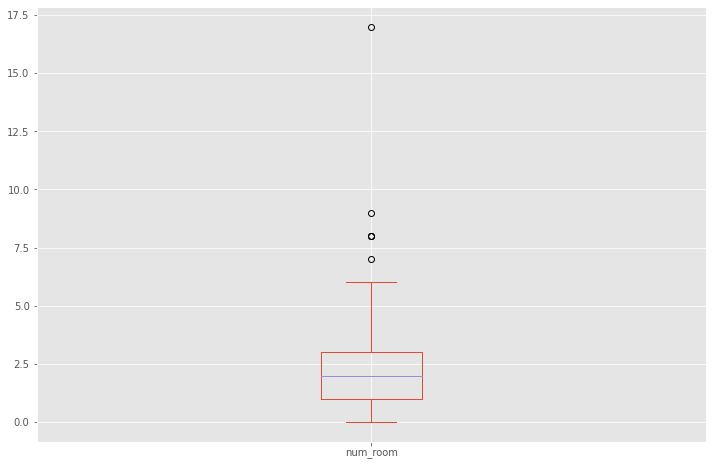

In [9]:
df['num_room'].plot(kind="box")
## TODO...

# Não entendi o que é para fazer aqui!

<AxesSubplot:>

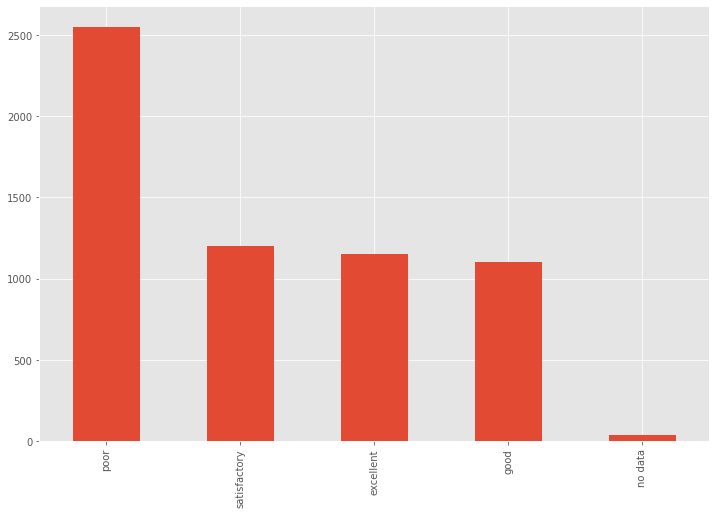

In [10]:
df['ecology'].value_counts().plot(kind="bar")
## TODO...

# Não entendi o que é para fazer aqui!

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [21]:
## TODO...

# Removendo as duplicatas de todas as colunas
# Removendo a coluna de ID
sem_id = df.drop(columns=['id'], inplace=False)
print(sem_id.drop_duplicates(keep='first', inplace=False))

# Usando os atributos
atributos = ["timestamp", "full_sq", "life_sq", "floor", "build_year", "num_room", "price_doc"]
print(sem_id.drop_duplicates(subset=atributos, keep='first', inplace=False))

        timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
8056   2013-05-21       11     11.0    2.0        5.0       2.0      1907.0   
8154   2013-05-27       45     27.0    6.0        9.0       1.0      1970.0   
8287   2013-06-03       77     50.0    3.0        5.0       2.0      1957.0   
8387   2013-06-07       56     29.0    5.0       16.0       5.0      1987.0   
8391   2013-06-07       31     21.0    5.0        9.0       5.0      1962.0   
...           ...      ...      ...    ...        ...       ...         ...   
30462  2015-06-30       47     30.0   23.0       25.0       4.0      2016.0   
30463  2015-06-30       56     29.0   13.0       14.0       1.0      2001.0   
30467  2015-06-30       86     59.0    3.0        9.0       2.0      1935.0   
30469  2015-06-30       64     32.0    5.0       15.0       1.0      2003.0   
30470  2015-06-30       43     28.0    1.0        9.0       1.0      1968.0   

       num_room  kitch_sq  state  ... cafe_count_50

### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [50]:
## TODO...

import re 

# Escolhendo valores não numéricos e corrigindo eles
# https://stackoverflow.com/questions/49893077/how-to-remove-symbols-from-both-sides-of-a-string
copied_df = df.copy()
for col in non_numeric_cols:
    copied_df[col] = copied_df[col].str.lower()
    copied_df[col] = copied_df[col].str.strip()
    re.sub('[^A-Za-z0-9]+', '', str(copied_df[col]))
    print(copied_df[col])

8056     2013-05-21
8154     2013-05-27
8287     2013-06-03
8387     2013-06-07
8391     2013-06-07
            ...    
30462    2015-06-30
30463    2015-06-30
30467    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 6042, dtype: object
8056        investment
8154        investment
8287        investment
8387        investment
8391        investment
             ...      
30462    owneroccupier
30463       investment
30467       investment
30469       investment
30470       investment
Name: product_type, Length: 6042, dtype: object
8056              hamovniki
8154        severnoe butovo
8287              ajeroport
8387     horoshevo-mnevniki
8391                ramenki
                ...        
30462        filevskij park
30463      severnoe tushino
30467              tverskoe
30469          obruchevskoe
30470           novogireevo
Name: sub_area, Length: 6042, dtype: object
8056     yes
8154      no
8287      no
8387      no
8391     yes
        ... 
3046

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [13]:
## TODO...

# Trocando todos os 
df_nm = df.select_dtypes(exclude=[np.number])
# Verificando verdadeiros e falsos para facilitar máscaras
df_nm.replace(['no','yes'], [False, True], inplace=True)
# Sistema de notas simples
df_nm.replace(['no data','poor', 'satisfactory','good','excellent'], [0,1,2,3,4], inplace=True)
# Usando binário para salvar os dados
df_nm.replace(['Investment','OwnerOccupier'],[0b0, 0b1],inplace=True)
# Usando hash maps para salvar cada um dos itens iguais no mesmo bucket
df_nm['sub_area'] = list(map(lambda x: hash(x), df_nm['sub_area']))
df_nm['timestamp'] = list(map(lambda x: pd.to_datetime(x).value, df_non_numeric['timestamp']))

print(df_nm)

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

In [55]:
## TODO...

# Matriz de correlação
print(df.corr())

df_non_numeric = df.select_dtypes(exclude=[np.number])
df_numeric     = df.select_dtypes(include=[np.number])

# Correlação entre as classes numéricas
correlacao_numerica = []
for i in df_numeric:
    for j in df_numeric:
        correlacao_numerica.append([i, j, df[i].corr(df[j])])

print(correlacao_numerica)

# Correlação entre classes não numéricas
correlacao_nao_numerica = []
for i in df_non_numeric:
    for j in df_numeric:
        correlacao_nao_numerica.append([i, j, df[i].corr(df[j])])

print(correlacao_nao_numerica)

                          id   full_sq   life_sq     floor  max_floor  \
id                  1.000000  0.044985  0.028391  0.034222   0.028376   
full_sq             0.044985  1.000000  0.856345  0.200456   0.283062   
life_sq             0.028391  0.856345  1.000000  0.124117   0.140861   
floor               0.034222  0.200456  0.124117  1.000000   0.596279   
max_floor           0.028376  0.283062  0.140861  0.596279   1.000000   
...                      ...       ...       ...       ...        ...   
mosque_count_5000   0.020988  0.123307  0.105711  0.037772   0.067526   
leisure_count_5000  0.025837  0.165024  0.193871 -0.026999  -0.043717   
sport_count_5000    0.028139  0.148878  0.178399 -0.052949  -0.082754   
market_count_5000  -0.011057 -0.010628  0.012895 -0.089184  -0.125881   
price_doc           0.085511  0.675455  0.524602  0.172476   0.219462   

                    material  build_year  num_room  kitch_sq     state  ...  \
id                 -0.012557   -0.020682  0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: unsupported operand type(s) for /: 'str' and 'int'